In [2]:
import pandas as pd
df=pd.read_excel('KH-1982-2018.xlsx')

In [3]:
print(df.keys())
print(df.shape)

Index(['SO2', 'CO', 'O3', 'Nox', 'NO', 'NO2', 'THC', 'NMHC', 'CH4',
       'WindSpeed', 'TEMP', 'Humidity', 'PM25'],
      dtype='object')
(401, 13)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 13 columns):
SO2          401 non-null float64
CO           401 non-null float64
O3           401 non-null float64
Nox          401 non-null float64
NO           401 non-null float64
NO2          401 non-null float64
THC          401 non-null float64
NMHC         401 non-null float64
CH4          401 non-null float64
WindSpeed    401 non-null float64
TEMP         401 non-null float64
Humidity     401 non-null float64
PM25         401 non-null int64
dtypes: float64(12), int64(1)
memory usage: 40.8 KB


In [25]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [26]:
X, y = df.iloc[:,:-1],df.iloc[:,-1]

In [27]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [29]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [30]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [31]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 9.892907


In [32]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [33]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,24.951147,0.397581,24.944768,0.848807
1,22.641575,0.312841,22.667464,0.850748
2,20.522030,0.282528,20.540586,0.803473
3,18.643914,0.254698,18.673480,0.784862
4,16.946255,0.213266,17.000326,0.716318


In [34]:
print((cv_results["test-rmse-mean"]).tail(1))

49    3.937559
Name: test-rmse-mean, dtype: float64


In [35]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

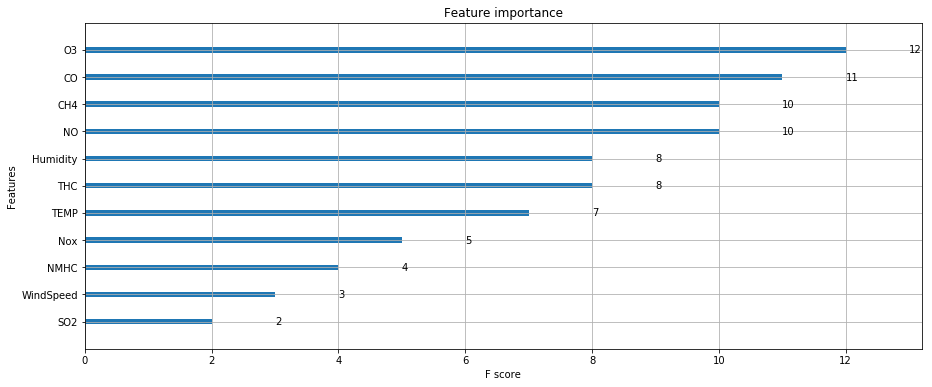

In [39]:
import matplotlib.pyplot as plt
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [15, 6]
plt.show()